<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 확률적 경사 하강법
조금씩 조심스럽게 산을 내려가며 원하는 지점에 도착한다고 생각하면된다.
확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할때 까지 계속한다.

확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크 epoch 라고 한다.

1개씩 말고 무작위로 몇개의 샘플을 선택해서 경사를 따라 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식을 미니배치 경사 하강법 minibatch gradient descent 이라 한다.

이때 사용하는 알고리즘이 신경망 알고리즘이다. 신경망은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵다. 따라서 신경망 모델은 꼭 확률적 경사 하강법이나 미니배치 경사 하강법을 사용한다.

In [18]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish[:5])

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [19]:
#input 과 target 으로 나눈 후 넘파이로 처리하기
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [20]:
#훈련 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

print(fish_input.shape)
print(fish_target.shape)

(159, 5)
(159,)


In [21]:
#정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [22]:
#사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier 이다. 임포트한다.
from sklearn.linear_model import SGDClassifier

#SGDClassifier 의 객체를 만들 때 2개의 매개변수를 지정한다. loss는 손실 함수의 종류를 지정한다.
#여기에서는 loss='log'로 지정하여 로지스틱 손실 함수를 지정했다. max_iter는 수행할 에포크 횟수를 지정한다.
#10으로 지정하여 전체 훈련 세트를 10회 반복하겠다(부족할 수 있다).
#그 다음 훈련세트와 테스트 세트에서 정확도 점수를 출력한다.

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해보자. 모델을 이어서 훈련할 때는 partial_fit()메서드를 사용한다. 이 메서드는 fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다. partial_fit() 메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수를 확인해 보자.

In [23]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [24]:
print(sc.predict(train_scaled[:5]))
print(sc.predict_proba(train_scaled[:5]))
print(sc.classes_)

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']
[[9.99954273e-01 1.06996563e-11 9.52302291e-20 3.74031763e-23
  4.55955150e-05 1.86436517e-56 1.31513353e-07]
 [1.49986147e-12 4.80104661e-54 5.47815178e-18 9.99999972e-01
  2.79448837e-08 8.27935059e-21 1.26313953e-14]
 [2.80319629e-27 4.78047257e-01 3.63348934e-13 1.42519503e-17
  7.20906614e-21 5.21952743e-01 1.32732132e-11]
 [5.53353383e-18 9.73554345e-10 9.45703883e-01 6.04674341e-14
  5.27144379e-02 7.73702049e-19 1.58167826e-03]
 [4.87775227e-08 9.99927538e-01 1.57934119e-13 3.14715991e-22
  6.40563979e-05 4.52119159e-21 8.35649244e-06]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.

에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 마치 산을 다 내려오지 못 하고 훈련을 마치는 셈이다. 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다. 훈련 세트에 아주 잘 맞는 모델이 만들어진다.

정리하자면 에포크 횟수가 너무 적으면 과소적합이, 너무 많다면 과대적합이 발생할 수 있다.

훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다. 바로 이지점이 모델이 과대적합되기 시작하는 곳이다. 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료 earily stopping 을 시도해야한다. 그래프를 통해 알아보겠다.

In [25]:
#에포크의 과대,과소 적합
# np.unique는 안에 배열(리스트, numpy array 등) 자료만 input으로 넣어주면 사용이 완료됩니다.
#고유한 원소들을 모은 뒤, 1차원 shape으로 변환하고 정렬을 진행한 결과를 반환합니다.
#ex ) np.unique([1,1,2,2,3,4]) => [1,2,3,4]
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [26]:
#따라서 classes 매개변수를 사용하는 이유는 다중 클래스 분류 문제에서 모델이 어떤 클래스를 예측해야 하는지 명시적으로 지정하기 위함입니다.
#점진적으로 경사를 하강하며 매번 나오는 300번의 test score 와 train 스코어를 배열에 저장한다
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


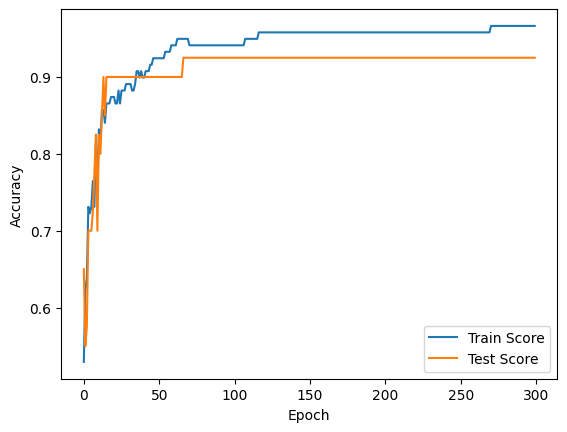

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='Train Score')
plt.plot(test_score, label='Test Score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

데이터가 작기 때문에 아주 잘 드러나지는 않지만, 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. 또 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.

즉, 우리는 train score 가 test score 보다는 높되, test score 은 어느 시점부터 커지지않기 때문에 두 점수가 너무 큰 차이가 나기 전까지의 최고의 반복횟수를 찾아야한다.

그럼 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해 보겠다. 그리고 최종적으로 훈련 세트와 테스트 세트에서 점수를 출력한다.

In [28]:
#좋은 결과가 나왔다
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


마지막으로 SGDClassifier의 loss 매개변수를 잠시 알아보겠다. 사실 loss 매개변수의 기본값은 'hinge'이다.

힌지 손실hinge loss은 '서포트 벡터 머신 support vector machine'이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다. 서포트 벡터 머신은 널리 사용하는 머신러닝 알고리즘 중 하나이다.

또한 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다.

In [29]:
#힌지 사용 예시(서포트 벡터 머신)
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
